In [ ]:
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib

In [93]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [94]:
results = pd.read_csv("data.csv", delimiter=";")
results

,LabTestResultID,TestResultDate,PatientID,TestValue,TestUnit,TestReferenceLimits,TestReferenceLowerLimit,TestReferenceUpperLimit,LabMethodID,LabMethodName
0,100043173@225259740,2021-04-25,2412103,Отрицательно,NaN,NaN,NaN,NaN,10000944,Глюкоза
1,100043174@225259741,2021-04-25,2412103,Отрицательно,NaN,NaN,NaN,NaN,10000945,Билирубин
2,100043175@225259742,2021-04-25,2412103,0.2,NaN,NaN,NaN,NaN,10000946,Уробилиноген
3,100043176@225259743,2021-04-25,2412103,<=5,NaN,NaN,NaN,NaN,10000947,Кетоны
4,100043177@225259744,2021-04-25,2412103,Отрицательно,NaN,NaN,NaN,NaN,9997208,Нитриты
...,...,...,...,...,...,...,...,...,...,...
3638600,129801963@-1,2021-10-14,6769367,58,%,47.00-72.00,47,72,10005146,(NEU%) Нейтрофилы
3638601,129801964@-1,2021-10-14,6769367,10.2,%,5.00-12.00,5,12,25256,(MONO%) Моноциты
3638602,129801965@-1,2021-10-14,6769367,30.4,%,19-37,19,37,25258,(LYM%) Лимфоциты
3638603,129801966@-1,2021-10-14,6769367,1.3,%,1.00-5.00,1,5,25255,(EOS%) Эозинофилы


# Анализы

In [95]:
unique_tests = results.LabMethodName.unique()

file = open("tests.txt", "w")
for i in range(len(unique_tests)):
    file.write(unique_tests[i] + "\n")
file.close()

unique_tests

array(['Глюкоза', 'Билирубин', 'Уробилиноген', ...,
       'Антитела к Mycoplasma pneumonia (класс IgG)',
       ' F242 вишня / Cherry (Prunus avium) ',
       ' F31 морковь / Carrot (Daucus carota) '], dtype=object)

In [96]:
def create_data(name: str, max = math.inf, min = -math.inf):
    results_parsed = results[results.LabMethodName == name]

    results_parsed = pd.to_numeric(results_parsed.TestValue, errors='coerce').dropna()

    results_parsed = results_parsed[results_parsed < max]
    results_parsed = results_parsed[min < results_parsed]
    print("Количество данных: " + str(len(results_parsed)))
    var = np.var(results_parsed)
    print("Дисперсия: " + str(var))
    print("Среднеквадратичное отклонение: " + str(math.sqrt(var)))
    print("Математическое ожидание: " + str(0.9 * np.average(results_parsed)))
    results_parsed.plot()

## Билирубин

Количество данных: 94
Дисперсия: 1.7199715708465368
Среднеквадратичное отклонение: 1.3114768663024663
Математическое ожидание: 1.531531914893617


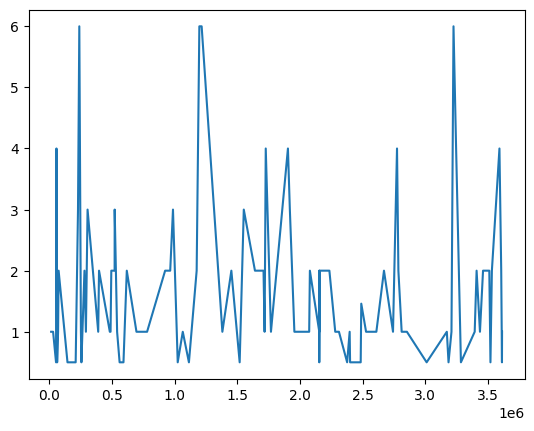

In [152]:
create_data("Билирубин", max=10)

## Уробилиноген

Количество данных: 9215
Дисперсия: 121.6175421665294
Среднеквадратичное отклонение: 11.028034374562377
Математическое ожидание: 3.524581660336408


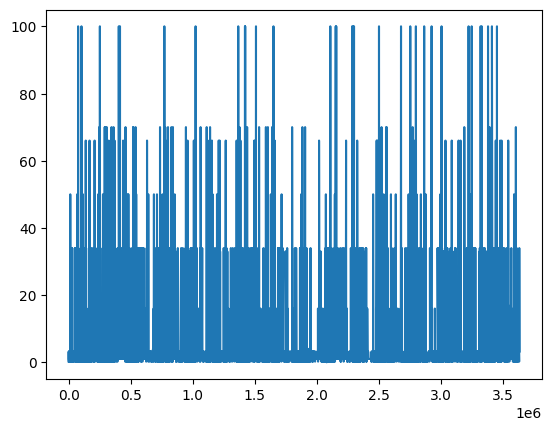

In [98]:
create_data("Уробилиноген")

## Кетоны

Количество данных: 1336
Дисперсия: 271.0401604519255
Среднеквадратичное отклонение: 16.463297374825174
Математическое ожидание: 8.342851796407185


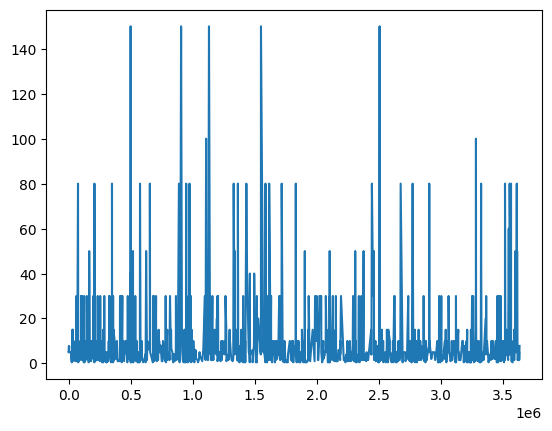

In [99]:
create_data("Кетоны")

# Анализ крови

## {HGB} Гемоглобин

Количество данных: 2673
Дисперсия: 303.93931948099134
Среднеквадратичное отклонение: 17.433855554093345
Математическое ожидание: 123.94882154882156


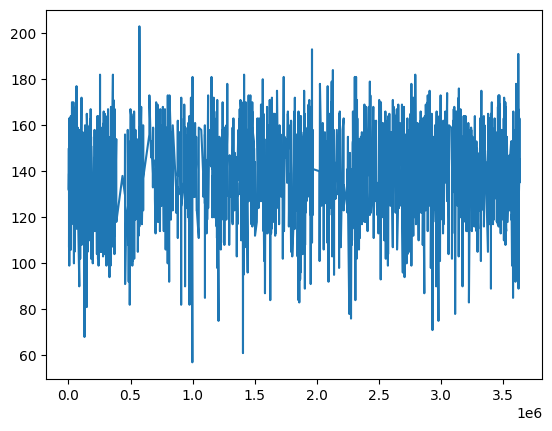

In [132]:
create_data("{HGB} Гемоглобин", min=50)

## {RBC} Эритроциты

Количество данных: 2673
Дисперсия: 0.31196772155468583
Среднеквадратичное отклонение: 0.5585407071599042
Математическое ожидание: 4.271218855218856


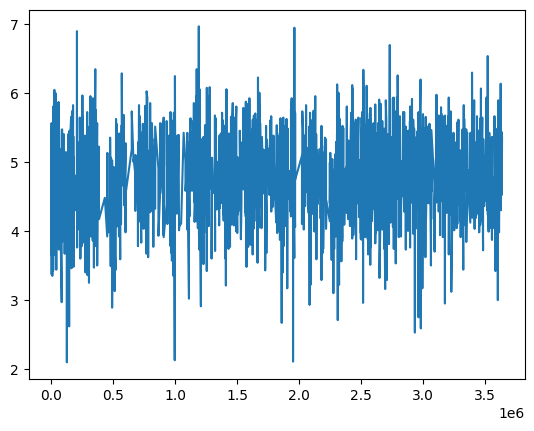

In [133]:
create_data("{RBC} Эритроциты", min=2)

## {HCT} Гематокрит

Количество данных: 2672
Дисперсия: 21.40342016425607
Среднеквадратичное отклонение: 4.626383054207257
Математическое ожидание: 36.358147455089814


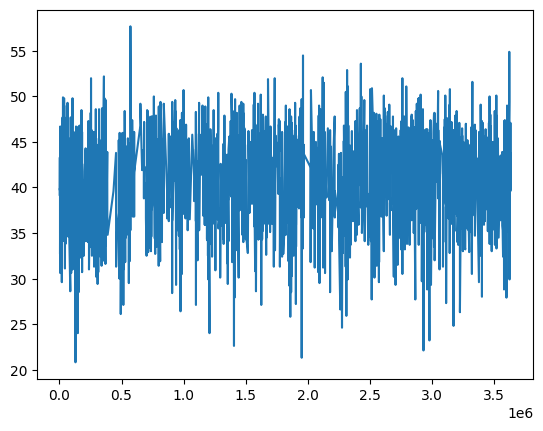

In [134]:
create_data("{HCT} Гематокрит", min=20)

## {MCV} Ср. объем эритроцита

Количество данных: 2674
Дисперсия: 38.43606520923108
Среднеквадратичное отклонение: 6.199682670042966
Математическое ожидание: 76.84384442782347


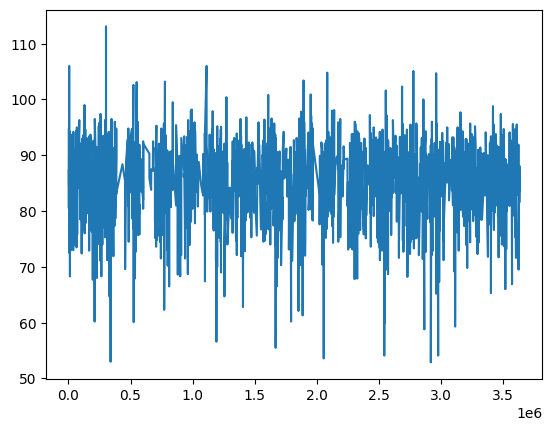

In [104]:
create_data("{MCV} Ср. объем эритроцита")

## {MCH} Ср.сод. гемоглоб. в эр-те

Количество данных: 2673
Дисперсия: 4.925609178201771
Среднеквадратичное отклонение: 2.2193713475220345
Математическое ожидание: 26.166666666666664


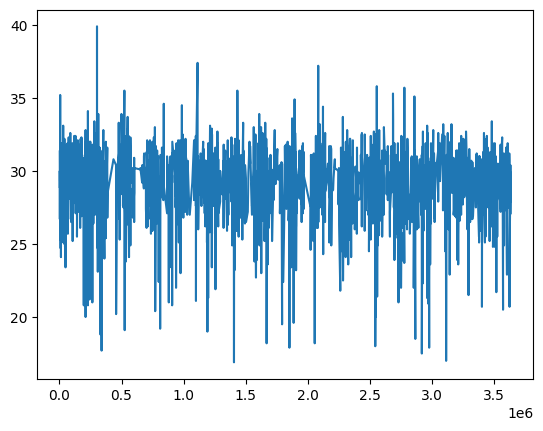

In [105]:
create_data("{MCH} Ср.сод. гемоглоб. в эр-те", 40)

## {MCHC} Ср.конц.гемоглоб. в эр-те

Количество данных: 2672
Дисперсия: 144.62850594656493
Среднеквадратичное отклонение: 12.026159235041124
Математическое ожидание: 306.5810254491018


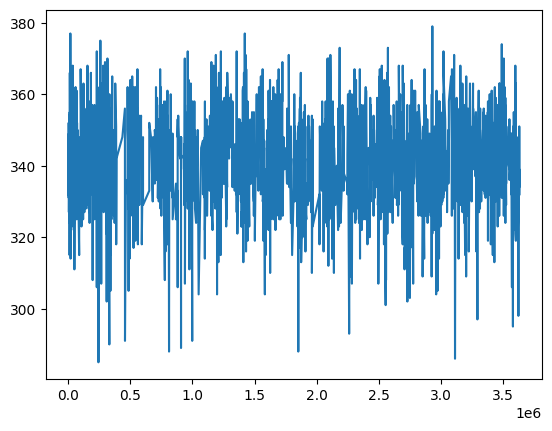

In [135]:
create_data("{MCHC} Ср.конц.гемоглоб. в эр-те", max=400, min=280)

## {RDW} Ширина распр. эр-та по объему

Количество данных: 2670
Дисперсия: 2.140888733184643
Среднеквадратичное отклонение: 1.4631776150504228
Математическое ожидание: 12.198573033707865


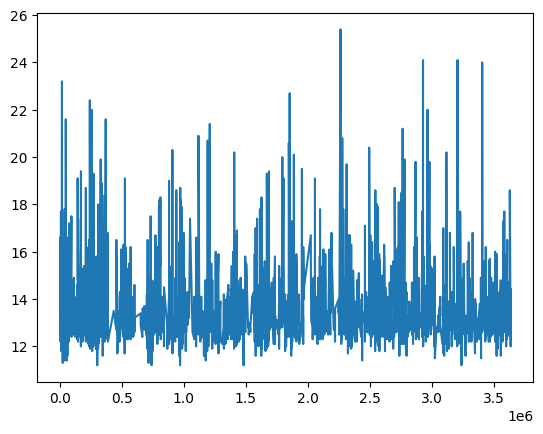

In [107]:
create_data("{RDW} Ширина распр. эр-та по объему")

## {PLT} Тромбоциты

Количество данных: 2673
Дисперсия: 6181.667455897742
Среднеквадратичное отклонение: 78.6235807878129
Математическое ожидание: 248.2734006734007


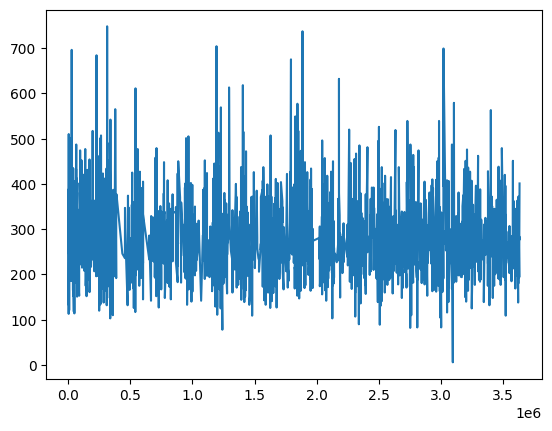

In [108]:
create_data("{PLT} Тромбоциты")

## {MPV} Средний объем тромбоцитов

Количество данных: 2661
Дисперсия: 0.9063103316644825
Среднеквадратичное отклонение: 0.9520033254482269
Математическое ожидание: 9.591544532130778


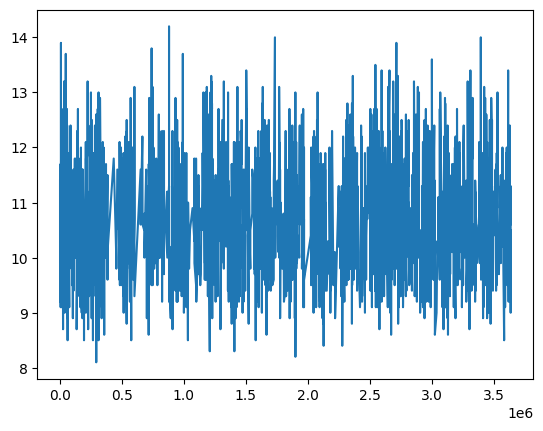

In [109]:
create_data("{MPV} Средний объем тромбоцитов")

## {PDW} Ширина распределения тромбоцитов

Количество данных: 2661
Дисперсия: 4.255724768006874
Среднеквадратичное отклонение: 2.0629408057447685
Математическое ожидание: 11.166899661781287


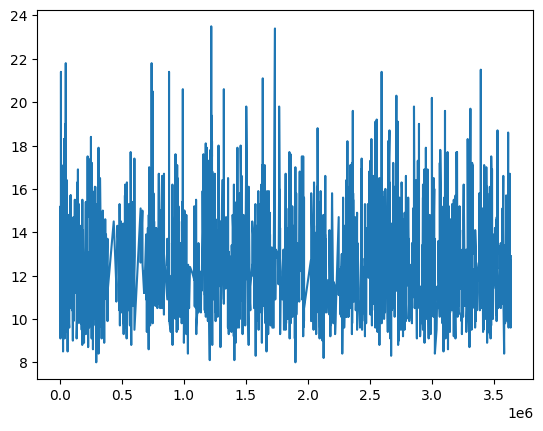

In [110]:
create_data("{PDW} Ширина распределения тромбоцитов")

## {PCT} Тромбоцитокрит

Количество данных: 2661
Дисперсия: 0.005679433847659083
Среднеквадратичное отклонение: 0.07536201860127609
Математическое ожидание: 0.26228523111612173


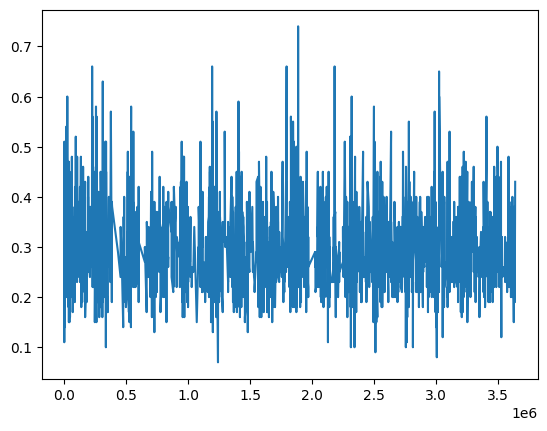

In [111]:
create_data("{PCT} Тромбоцитокрит")

## {P-LCR} Коэффициент крупных тромбоцитов

Количество данных: 2661
Дисперсия: 59.68494243333599
Среднеквадратичное отклонение: 7.725603046580635
Математическое ожидание: 26.95545659526494


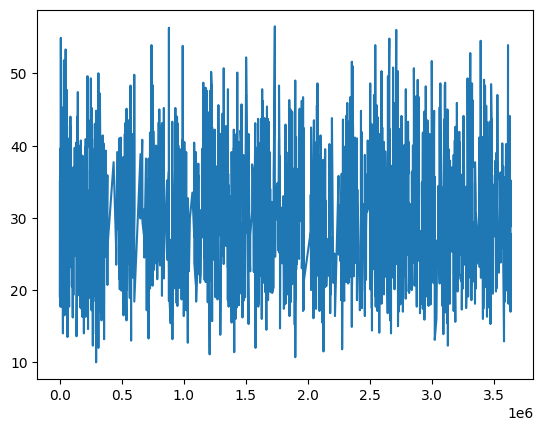

In [112]:
create_data("{P-LCR} Коэффициент крупных тромбоцитов")

## {WBC} Лейкоциты

Количество данных: 2674
Дисперсия: 8.032109999669943
Среднеквадратичное отклонение: 2.8340977399641574
Математическое ожидание: 6.602176514584891


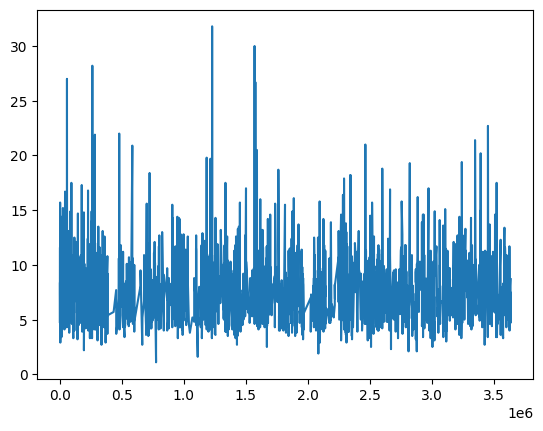

In [113]:
create_data("{WBC} Лейкоциты")

## {NEU#} Кол-во нейтрофилов

Количество данных: 2669
Дисперсия: 5.415176942178217
Среднеквадратичное отклонение: 2.3270532744606895
Математическое ожидание: 3.7424185088047968


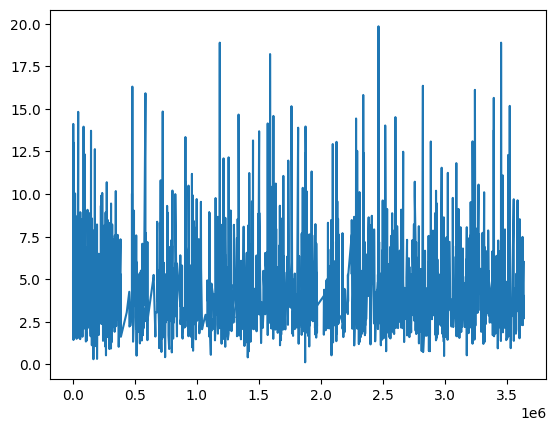

In [137]:
create_data("{NEU#} Кол-во нейтрофилов", max=20)

## {LYM#} Кол-во лимфоцитов

Количество данных: 2670
Дисперсия: 1.0931885878747074
Среднеквадратичное отклонение: 1.0455565923825967
Математическое ожидание: 2.0449988764044944


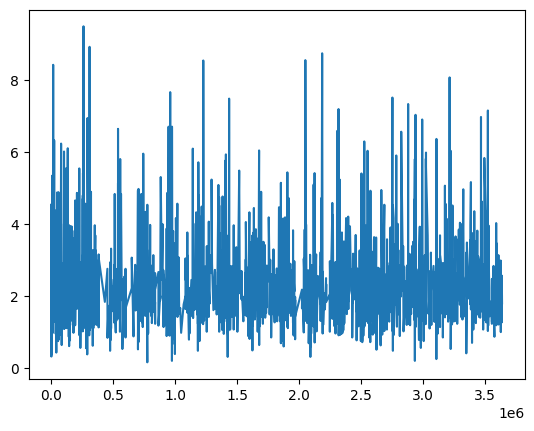

In [139]:
create_data("{LYM#} Кол-во лимфоцитов", max=10)

## {MONO#} Кол-во моноцитов

Количество данных: 2670
Дисперсия: 0.0702391995960106
Среднеквадратичное отклонение: 0.26502679033639337
Математическое ожидание: 0.5729662921348315


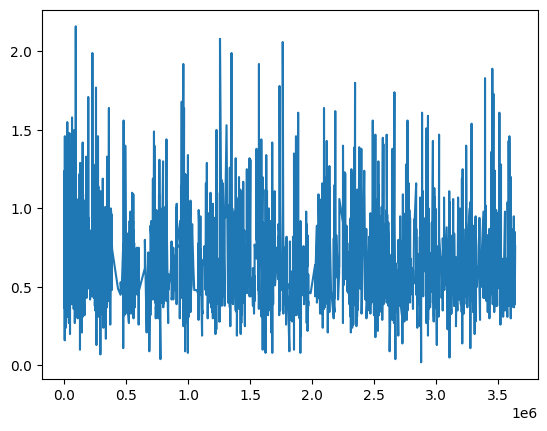

In [140]:
create_data("{MONO#} Кол-во моноцитов", 2.2)

## {EOS#} Кол-во эозинофилов

Количество данных: 2667
Дисперсия: 0.029602541358370694
Среднеквадратичное отклонение: 0.17205389085507683
Математическое ожидание: 0.1535838020247469


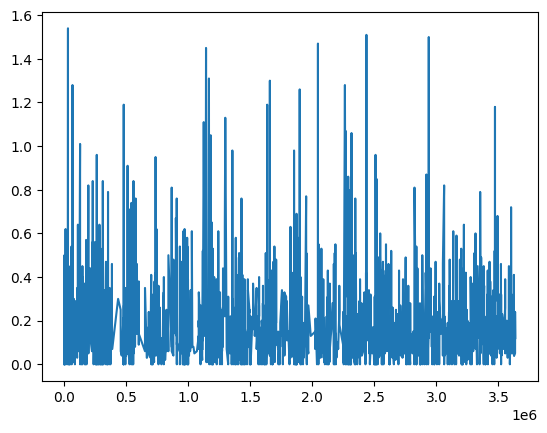

In [141]:
create_data("{EOS#} Кол-во эозинофилов", max=1.6)

## {BASO#} Кол-во базофилов

Количество данных: 2673
Дисперсия: 0.00044968799550002534
Среднеквадратичное отклонение: 0.021205848143849973
Математическое ожидание: 0.013447811447811448


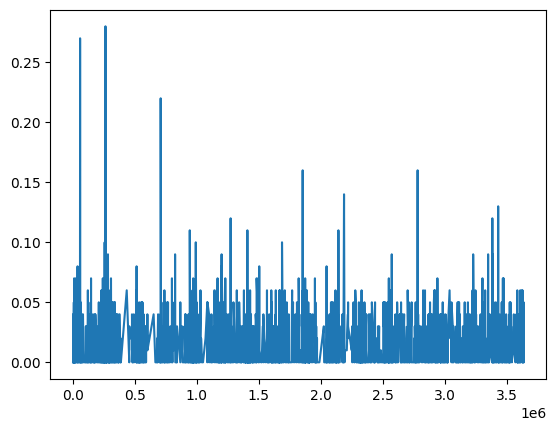

In [142]:
create_data("{BASO#} Кол-во базофилов", max=0.3)

## Нейтрофилы сегментоядерные

Количество данных: 2674
Дисперсия: 178.4333506846449
Среднеквадратичное отклонение: 13.357894695072456
Математическое ожидание: 49.43436798803291


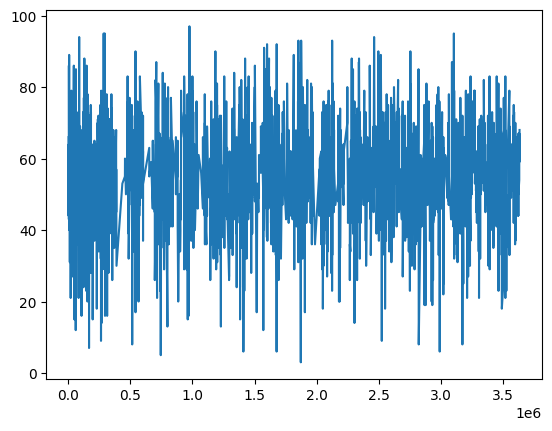

In [119]:
create_data("Нейтрофилы сегментоядерные")

# Биохимия

## Мочевина

Количество данных: 21385
Дисперсия: 29.06628674130667
Среднеквадратичное отклонение: 5.3913158636187015
Математическое ожидание: 6.286920224456396


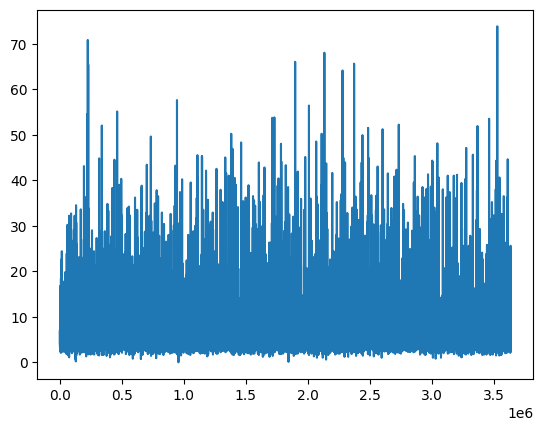

In [143]:
create_data("Мочевина", max=100)

## Глюкоза

Количество данных: 14643
Дисперсия: 2.042437838827184
Среднеквадратичное отклонение: 1.4291388451886626
Математическое ожидание: 5.17150172095882


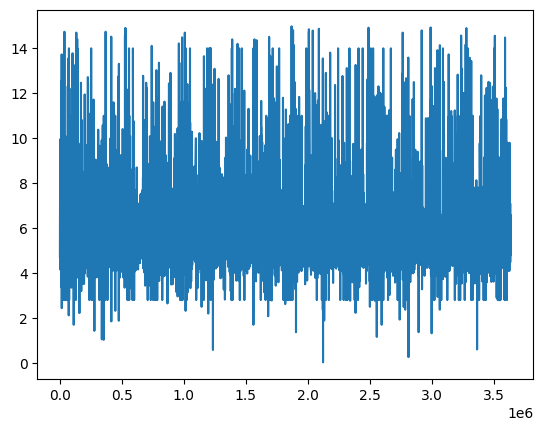

In [121]:
create_data("Глюкоза", 15)

## Креатин

Количество данных: 0
Дисперсия: nan
Среднеквадратичное отклонение: nan
Математическое ожидание: nan


/opt/homebrew/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/homebrew/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


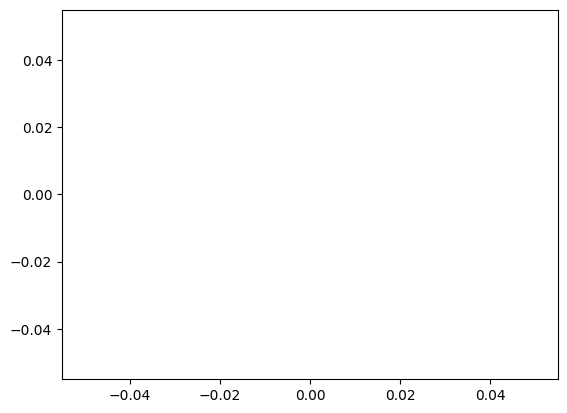

In [122]:
create_data("Креатин")

## Мочевая кислота

Количество данных: 5550
Дисперсия: 12593.309191919452
Среднеквадратичное отклонение: 112.21991441771577
Математическое ожидание: 293.5523010810811


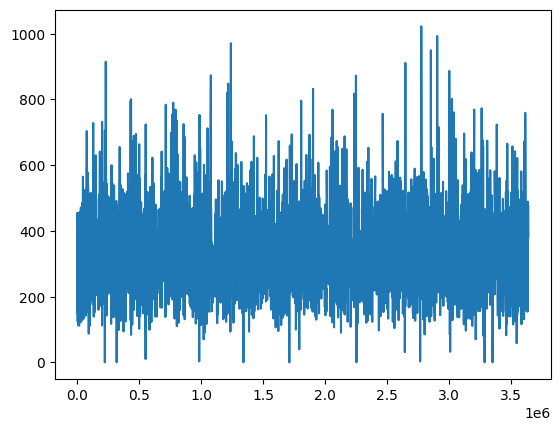

In [144]:
create_data("Мочевая кислота", max=1100)

## С-реактивный белок

Количество данных: 12881
Дисперсия: 4039.195645999431
Среднеквадратичное отклонение: 63.55466659498286
Математическое ожидание: 31.297236239422404


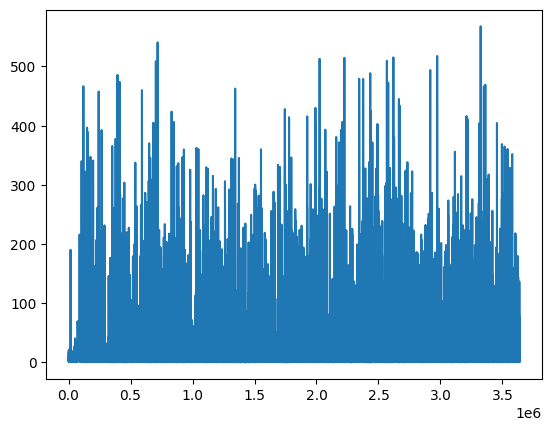

In [124]:
create_data("С-реактивный белок")

## Относительная плотность

Количество данных: 20367
Дисперсия: 76762.87767291916
Среднеквадратичное отклонение: 277.0611442857319
Математическое ожидание: 74.94920782147592


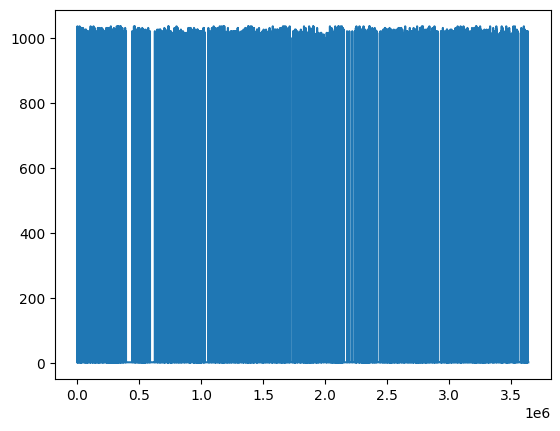

In [125]:
create_data("Относительная плотность")

## Реакция (PH)

Количество данных: 1373
Дисперсия: 0.5298934449578783
Среднеквадратичное отклонение: 0.7279378029460197
Математическое ожидание: 5.067006554989074


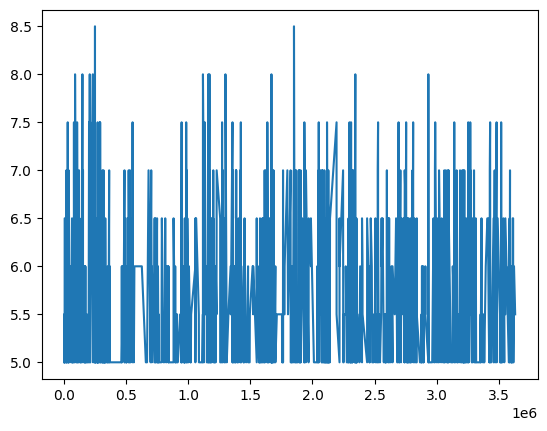

In [126]:
create_data("Реакция (PH)")

## 

# Еще какие-то анализы

## Тестостерон общий

Количество данных: 975
Дисперсия: 91.23746571979068
Среднеквадратичное отклонение: 9.55183049052854
Математическое ожидание: 7.249078153846153


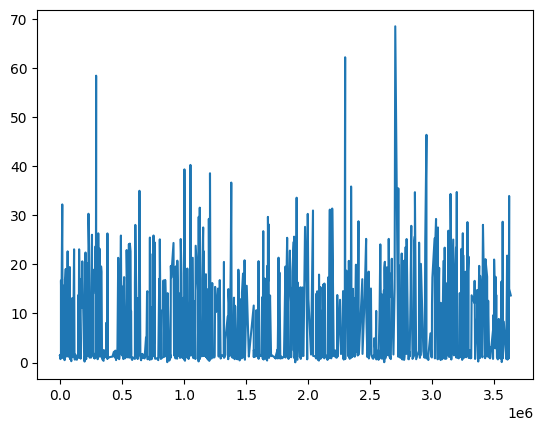

In [145]:
create_data("Тестостерон общий", max=80)

## Эритроциты

Количество данных: 36732
Дисперсия: 638682.5043179806
Среднеквадратичное отклонение: 799.1761409839389
Математическое ожидание: 42.09199763149298


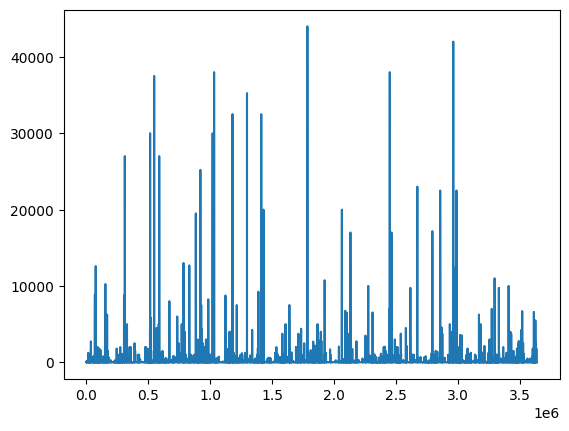

In [148]:
create_data("Эритроциты", max=50000)

## Лейкоциты

Количество данных: 36587
Дисперсия: 10402459.63856198
Среднеквадратичное отклонение: 3225.2844275446437
Математическое ожидание: 133.13495546232267


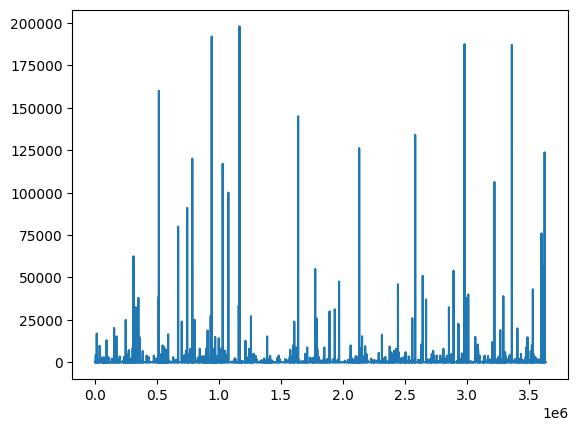

In [149]:
create_data("Лейкоциты", max=200000)

## Слизь

Количество данных: 3183
Дисперсия: 3.554923610932214
Среднеквадратичное отклонение: 1.8854505060945552
Математическое ожидание: 0.5378510838831292


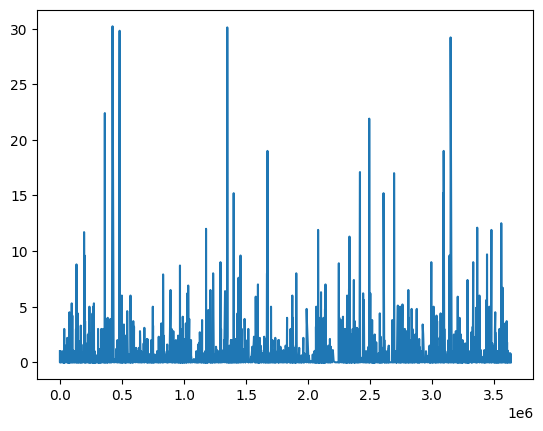

In [150]:
create_data("Слизь", max=35)

## Бактерии

Количество данных: 2345
Дисперсия: 5578609.563888143
Среднеквадратичное отклонение: 2361.908034595789
Математическое ожидание: 438.2846481876333


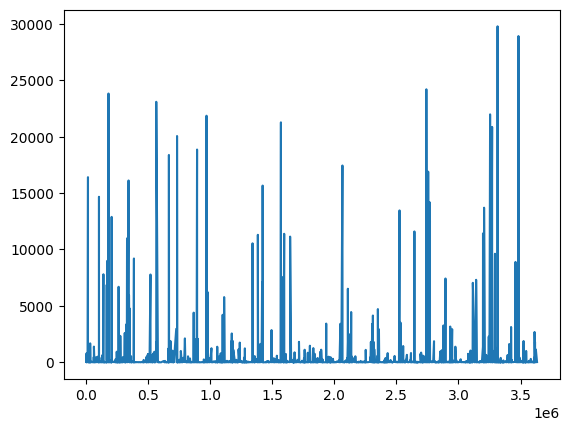

In [151]:
create_data("Бактерии", max=30000)